<a href="https://colab.research.google.com/github/JMyers2292/Linear-Regression-From-Scratch/blob/main/31005_ML_A2_Linear_Regression_Algorithm_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


 # **Subject Number**: 31005 - Machine Learning
# **Student Number**: 13036379
# **Student Name**: Jeremy Myers
# **ML Algorithm**: Linear Regression with Gradient Descent

#**Step 1: Importing of dependancies**

In [52]:
# Importing Dependencies
import numpy as np # For linear alg/vector manipulation
import pandas as pd # Manipulate data
from matplotlib import pyplot as plt # Data visualisation
import seaborn as sns # Data visualisation 
from sklearn import datasets # Utilisation of pre-existing datasets
from math import isnan

# **Step 2a: Data Exploration & Preparation**
**Example 1**: Sklearn Diabetes Pre load Dataset


**Attribute Information**:

  1. age (age in years)
  2. sex
  3. bmi (body mass index)
  4. bp (average blood pressure)
  5. s1 (tc, total serum cholesterol)
  6. s2 (ldl, low-density lipoproteins)
  7. s3 (hdl, high-density lipoproteins)
  8. s4 (tch, total cholesterol / HDL)
  9. s5 (ltg, possibly log of serum triglycerides level)
  10. s6 (glu, blood sugar level)

**Target Information**:
  11. Y (a quantitative measure of disease progression one year after baseline)



In [53]:
diabetes_df = pd.DataFrame(data=datasets.load_diabetes().data, 
                           columns=datasets.load_diabetes().feature_names)

# Adding the Target column to the dataframe
diabetes_df['Y'] = datasets.load_diabetes().target
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [54]:
diabetes_df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-3.639623e-16,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.309912e-16,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-8.013951e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,1.289818e-16,0.047619,-0.112400,-0.036656,-0.005671,0.035644,0.132044
s1,442.0,-9.042540e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,1.301121e-16,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-4.563971e-16,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,3.863174e-16,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,-3.848103e-16,0.047619,-0.126097,-0.033249,-0.001948,0.032433,0.133599
s6,442.0,-3.398488e-16,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


In [55]:
# Check for:
#   1. Number of attributes/features in set 
#   2. What dtype is the data
#   3. Is there missing values
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  Y       442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


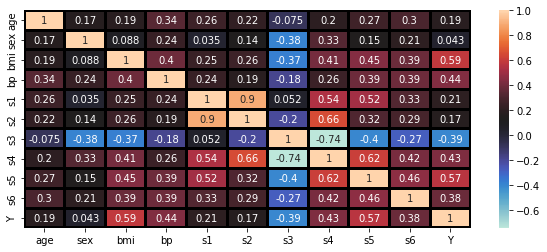

In [56]:
# View Heatmap correlation of the data, to check for linearity
plt.figure(figsize=(10,4))
sns.heatmap(diabetes_df.corr(), annot=True, linewidths=2,linecolor='black', cmap='icefire')
plt.show()

In [57]:
# Showing a clearer version of the correlation values in regards to Target 'Y' 
diabetes_df.corr()['Y']

age    0.187889
sex    0.043062
bmi    0.586450
bp     0.441484
s1     0.212022
s2     0.174054
s3    -0.394789
s4     0.430453
s5     0.565883
s6     0.382483
Y      1.000000
Name: Y, dtype: float64

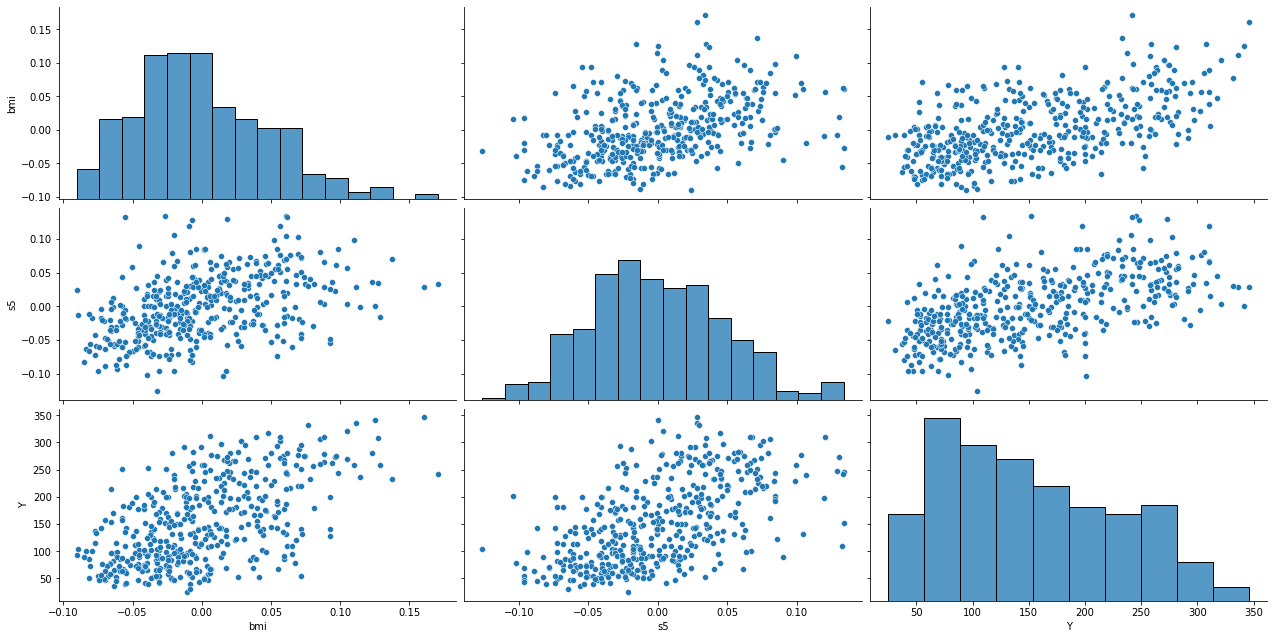

In [58]:
# Showing the relationship between the most correlated attributes and the Target
diabetes_target_df = diabetes_df[['bmi', 's5','Y']]
sns.pairplot(diabetes_target_df, height=3, aspect=2)

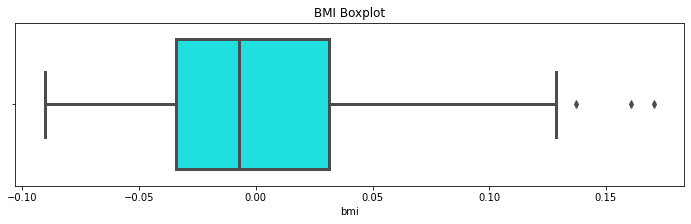

In [59]:
# Different visualisation of the selected X dataset attribute to identify potential skewness and range of the data
plt.figure(figsize=(12,3))
sns.boxplot(data=diabetes_df, x='bmi', color='cyan', linewidth=3)
plt.title('BMI Boxplot')
plt.show()

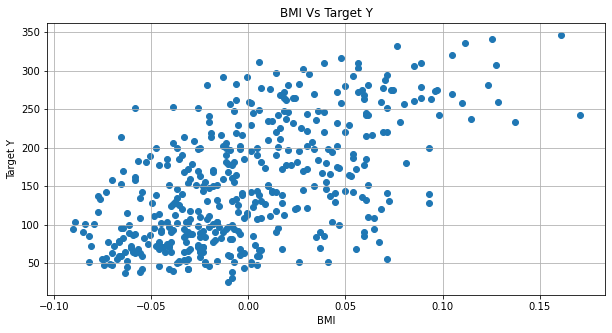

In [60]:
# Plotting data of the most correlated attribute to the Target to visually inspect it 
plt.figure(figsize=(10,5))
plt.scatter(diabetes_df['bmi'], diabetes_df['Y'])
plt.title("BMI Vs Target Y")
plt.xlabel("BMI")
plt.ylabel('Target Y')
plt.grid(True)
plt.show()

# **Step 2b: Data Exploration & Preparation**
**Example 2**: Sklearn California House Price Pre-loaded Dataset


**Attribute Information**:
  1. MedInc (median income in block group)
  2. HouseAge (median house age in block group)
  3. AveRooms (average number of rooms per household)
  4. AveBedrms (average number of bedrooms per household)
  5. Population (block group population)
  6. AveOccup (average number of household members)
  7. Latitude (block group latitude)
  8. Longitude (block group longitude)

**Target Information**:
  
  9. MedVal (median house value)

In [61]:
# California Housing Price dataset, Target is median house value
house_df = pd.DataFrame(data=datasets.fetch_california_housing().data, 
                        columns=datasets.fetch_california_housing().feature_names)

# Adding the Target column to the dataframe
house_df['MedVal'] = datasets.fetch_california_housing().target * 100000
house_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,452600.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,358500.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,352100.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,341300.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,342200.0


In [62]:
house_df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedVal,20640.0,206855.816909,115395.615874,14999.000000,119600.000000,179700.000000,264725.000000,500001.000000


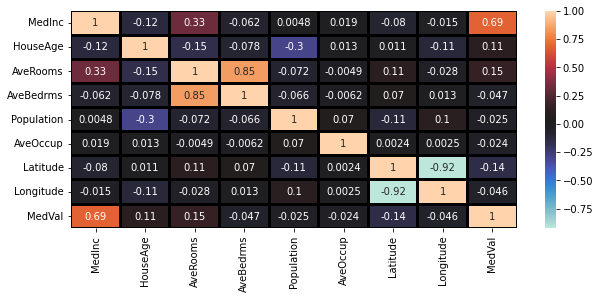

In [63]:
# View Heatmap correlation of the data, to check for linearity
plt.figure(figsize=(10,4))
sns.heatmap(house_df.corr(), annot=True, linewidths=2,linecolor='black', cmap='icefire')
plt.show()

In [64]:
# Showing a clearer version of the correlation values in regards to Target 'MedVal' 
house_df.corr()['MedVal']

MedInc        0.688075
HouseAge      0.105623
AveRooms      0.151948
AveBedrms    -0.046701
Population   -0.024650
AveOccup     -0.023737
Latitude     -0.144160
Longitude    -0.045967
MedVal        1.000000
Name: MedVal, dtype: float64

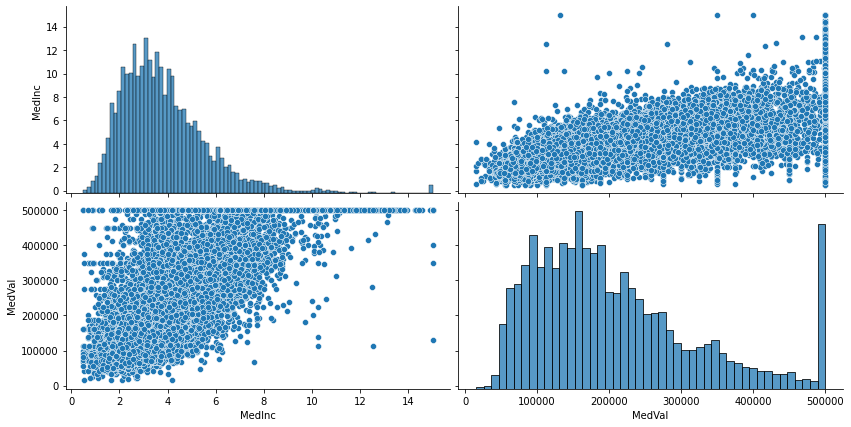

In [65]:
# Showing the relationship between the most correlated attributes and the Target
house_target_df = house_df[['MedInc','MedVal']]
sns.pairplot(house_target_df, height=3, aspect=2)

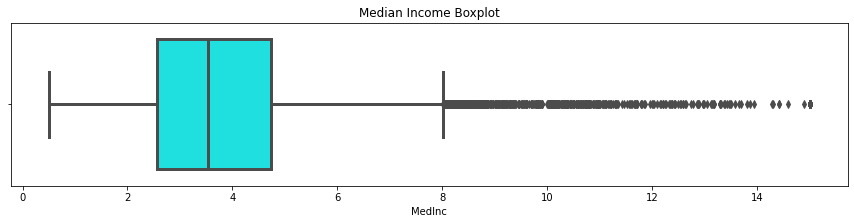

In [66]:
# Different visualisation of the selected X dataset attribute to identify potential skewness and range of the data
plt.figure(figsize=(15,3))
sns.boxplot(data=house_df, x='MedInc', color='cyan', linewidth=3)
plt.title('Median Income Boxplot')
plt.show()

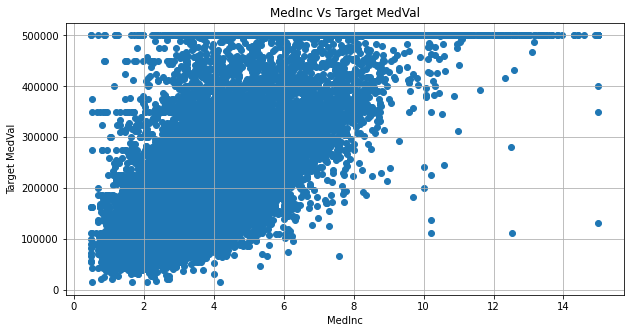

In [67]:
# Plotting data of the most correlated attribute to the Target to visually inspect it 
plt.figure(figsize=(10,5))
plt.scatter(house_df.MedInc, house_df.MedVal)
plt.title("MedInc Vs Target MedVal")
plt.xlabel("MedInc")
plt.ylabel('Target MedVal')
plt.grid(True)
plt.show()

# **Step 3: Creating Linear Regression Model**

In [68]:
class MyLinearRegression:
  # initiating the hyperparameters (learning rate & total number of iterations)
  def __init__(self, learning_rate, iterations):
    self.learning_rate = learning_rate
    self.iterations = iterations


  def fit(self, X, Y):
    '''
      Cost Fx used: Mean Squared Error (MSE)
      Implementation: 
         1. Will iterate through and calculate and update
            the parameters (weights [theta_1] and bias [theta_0])
            using the gradient descent optimization alogorithm
         2. Gradient descent is done by getting the partial derive 
            of the MSE Eqn in respects to theta_0 and theta_1
         3. The result from step 2 is multiplied with the learning rate
            and subtracted from the old theta value
         4. Steps are repeated till iterations are complete or till 
            convergence 
    '''
    # number of training samples & number of features
    self.samples, self.features = X.shape  # No* of rows & columns
    self.cost_list = []

    # initiating the weights and bias 
    self.weights = np.zeros(self.features)
    self.bias = 0
    self.X = X
    self.Y = Y


    # Gradient Descent
    print('Gradient Descent commencing:')
    print(f'Learning_rate: {self.learning_rate}\titerations: {self.iterations}')
    for iter in range(self.iterations):
       self.update_parameters()
       self.cost_list.append(self.cost)
    if isnan(self.weights) and isnan(self.bias) == True:
        print(f'Final weights: Unable to Converge\tFinal bias: Unable to Converge')
    else:
        print(f'Final weights: {self.weights[0]}\tFinal bias: {self.bias}')
    return self.weights, self.bias

  def update_parameters(self):
    Y_prediction = self.predict(self.X)
    self.cost = (1/(2*self.samples)) * np.sum((Y_prediction - self.Y)**2)
    
    # calculating gradients of weights and bias
    dev_weights = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.samples
    dev_bias = - 2 * np.sum(self.Y - Y_prediction)/self.samples

    # upadating the parameters
    self.weights = self.weights - self.learning_rate * dev_weights
    self.bias = self.bias - self.learning_rate * dev_bias


  def predict(self, X):
    '''
      hypothesis Fx Eqn h(x) = theta_0 + theta_1 * X
    '''
    return X.dot(self.weights) + self.bias


  def show_costs(self):
    print(f'Final Cost Value: {self.cost_list[-1]}')
    plt.figure(figsize=(8,5))
    plt.scatter(self.cost_list, range(self.iterations))
    plt.title(f'Cost Over Iterations, LR = {self.learning_rate}')
    plt.xlabel('Cost')
    plt.ylabel('Iterations')
    plt.grid(True)
    plt.show()


  def score(self):
    Y_pred = self.predict(self.X)
    # Sum of Squared Residuals (SSR)
    ssr = ((self.Y - Y_pred)**2).sum()
    # Sum of Squares Total (SST)
    sst = ((self.Y - self.Y.mean())**2).sum()
    r2 = 1 -(ssr/sst)
    return r2  

# **Step 4a: Splitting of Dataset**
Example 1: Diabetes Dataset

In [69]:
# Using only 1 feature with most correlation
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X = diabetes_X[:, np.newaxis, 2] # Assign bmi to X as most linear correlation
diabetes_X.shape

(442, 1)

In [70]:
# Split X and y into 70% training and 30% testing, using random_state for recreation of same train & test data
from sklearn.model_selection import train_test_split
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(diabetes_X, diabetes_y, train_size= 0.7, random_state=1)

# **Step 5a: Implementation and Evaluation of LR Model on Datasets**
Example 1: Diabetes Dataset

In [71]:
learning_rates = [0.001, 5, 0.12, 0.5]

Gradient Descent commencing:
Learning_rate: 0.001	iterations: 2000
Final weights: 9.962280719321345	Final bias: 151.23467844877507
R2 score: 0.0063185631594769864

Final Cost Value: 3131.5623147085876


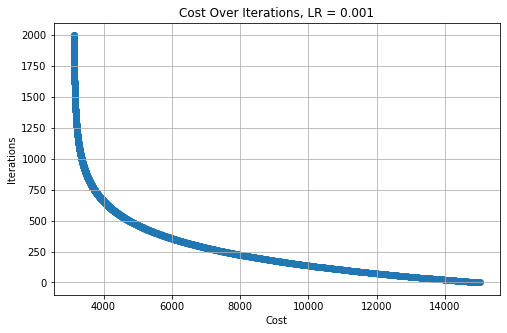



Gradient Descent commencing:
Learning_rate: 5	iterations: 2000
Final weights: Unable to Converge	Final bias: Unable to Converge
R2 score: nan

Final Cost Value: nan


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in double_scalars


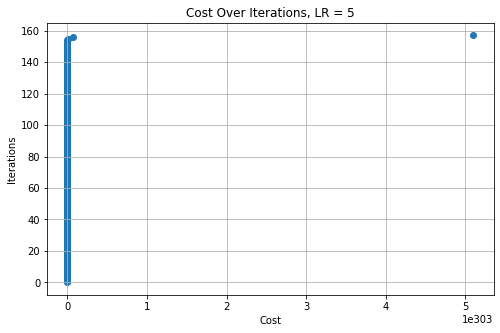



Gradient Descent commencing:
Learning_rate: 0.12	iterations: 2000
Final weights: 694.6403628939238	Final bias: 152.27908673562382
R2 score: 0.351483571365814

Final Cost Value: 2043.913304235349


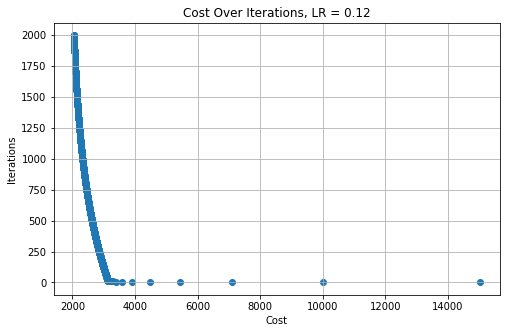



Gradient Descent commencing:
Learning_rate: 0.5	iterations: 2000
Final weights: 1020.992406229273	Final bias: 151.43725343146824
R2 score: 0.39324492469680095

Final Cost Value: 1912.1574196065167


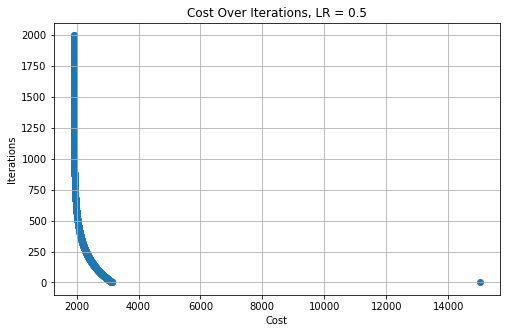

In [72]:
# Implement My Cretated Linear Regression Class
for lr in learning_rates:
  diabetes_LR = MyLinearRegression(learning_rate= lr, iterations=2000)
  final_weights, final_bias = diabetes_LR.fit(diabetes_X_train, diabetes_y_train)
  diabetes_r2 = diabetes_LR.score()
  diabetes_best_model_r2 = 0
  print(f'R2 score: {diabetes_r2}\n')
  if diabetes_r2 > diabetes_best_model_r2 and not isnan(diabetes_r2):
    diabetes_best_model = diabetes_LR

  # Plotting the Iterations over the Cost of the LR model
  diabetes_LR.show_costs()
  print('\n')

In [73]:
# Predict Values for plotting
diabetes_y_pred_train = diabetes_best_model.predict(diabetes_X_train)
diabetes_y_pred_test = diabetes_best_model.predict(diabetes_X_test)

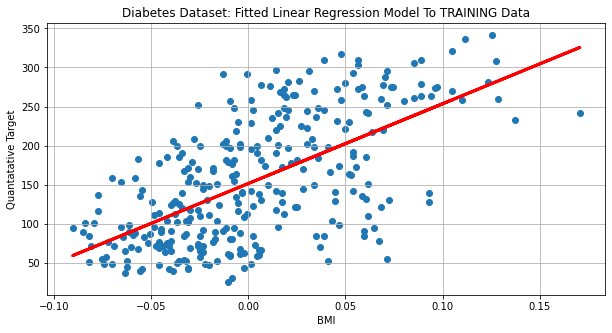

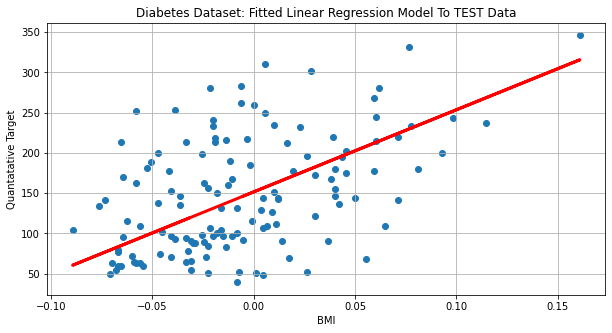

In [74]:
plt.figure(figsize=(10,5))
plt.scatter(diabetes_X_train, diabetes_y_train)
plt.plot(diabetes_X_train, diabetes_y_pred_train, color='red', linewidth=3)
plt.title('Diabetes Dataset: Fitted Linear Regression Model To TRAINING Data')
plt.xlabel('BMI')
plt.ylabel('Quantatative Target')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
plt.scatter(diabetes_X_test, diabetes_y_test)
plt.plot(diabetes_X_test, diabetes_y_pred_test, color='red', linewidth=3)
plt.title('Diabetes Dataset: Fitted Linear Regression Model To TEST Data')
plt.xlabel('BMI')
plt.ylabel('Quantatative Target')
plt.grid(True)
plt.show()

In [75]:
# Example of 5 h(x) equations
for i in range(5):
  print(f'Eqn.{i+1}: {final_bias} + {final_weights[0]} * {diabetes_X_test[i][0]} = {final_bias + np.dot(final_weights,diabetes_X_test[i])}')

Eqn.1: 151.43725343146824 + 1020.992406229273 * -0.0320734439089499 = 118.69051075880986
Eqn.2: 151.43725343146824 + 1020.992406229273 * -0.0406959404999971 = 109.88700721661287
Eqn.3: 151.43725343146824 + 1020.992406229273 * 0.0929527566612346 = 246.34131212066626
Eqn.4: 151.43725343146824 + 1020.992406229273 * -0.0654856181992578 = 84.57693453279654
Eqn.5: 151.43725343146824 + 1020.992406229273 * 0.00564997867688165 = 157.20583875592172


# **Step 4a: Splitting of Dataset**
Example 2: California House Price Dataset

In [76]:
# Using only 1 feature with most correlation
house_X, house_y = datasets.fetch_california_housing(return_X_y=True)
house_X = house_X[:, np.newaxis, 0] # Assign MedInc to X as most linear correlation

In [77]:
# Split X and y into 70% training and 30% testing, using random_state for recreation of same train & test data
from sklearn.model_selection import train_test_split
house_X_train, house_X_test, house_y_train, house_y_test = train_test_split(house_X, house_y, train_size= 0.7, random_state=2)

# **Step 5a: Implementation and Evaluation of LR Model on Datasets**
Example 2: California House Price Dataset

Gradient Descent commencing:
Learning_rate: 0.001	iterations: 2000
Final weights: 0.45394718830049824	Final bias: 0.278246173909485
R2 score: 0.47316089823960983

Final Cost Value: 0.3483269600946827


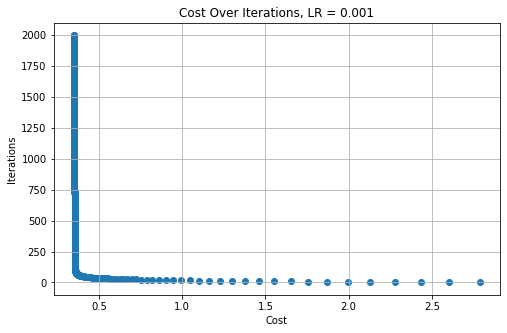



Gradient Descent commencing:
Learning_rate: 5	iterations: 2000


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in subtract
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in double_scalars


Final weights: Unable to Converge	Final bias: Unable to Converge
R2 score: nan

Final Cost Value: nan


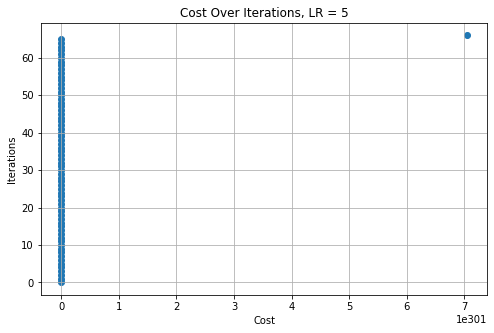



Gradient Descent commencing:
Learning_rate: 0.12	iterations: 2000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: RuntimeWarning: overflow encountered in multiply


Final weights: Unable to Converge	Final bias: Unable to Converge
R2 score: nan

Final Cost Value: nan


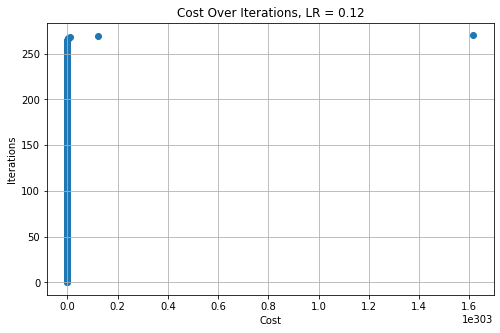



Gradient Descent commencing:
Learning_rate: 0.5	iterations: 2000
Final weights: Unable to Converge	Final bias: Unable to Converge
R2 score: nan

Final Cost Value: nan


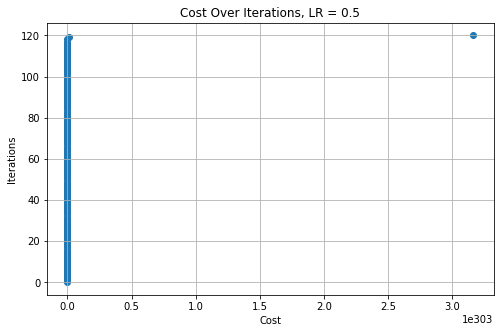

In [78]:
# Implement My Cretated Linear Regression Class
for lr in learning_rates:
  house_LR = MyLinearRegression(learning_rate= lr, iterations=2000)
  house_LR.fit(house_X_train, house_y_train)
  house_r2 = house_LR.score()
  house_best_model_r2 = 0
  print(f'R2 score: {house_r2}\n')
  if house_r2 > house_best_model_r2 and not isnan(house_r2):
    house_best_model = house_LR

  # Plotting the Iterations over the Cost of the LR model
  house_LR.show_costs()
  print('\n')

In [79]:
# Predict Values for plotting
house_y_pred_train = house_best_model.predict(house_X_train)
house_y_pred_test = house_best_model.predict(house_X_test)

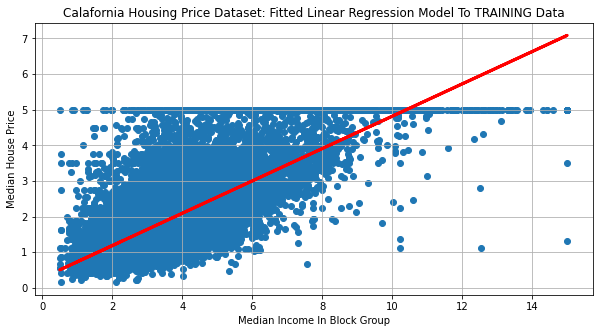

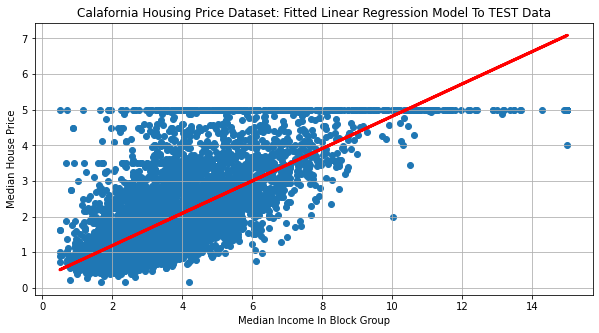

In [80]:
plt.figure(figsize=(10,5))
plt.scatter(house_X_train, house_y_train)
plt.plot(house_X_train, house_y_pred_train, color='red',  linewidth=3)
plt.title('Calafornia Housing Price Dataset: Fitted Linear Regression Model To TRAINING Data')
plt.xlabel('Median Income In Block Group')
plt.ylabel('Median House Price')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
plt.scatter(house_X_test, house_y_test)
plt.plot(house_X_test, house_y_pred_test, color='red', linewidth=3)
plt.title('Calafornia Housing Price Dataset: Fitted Linear Regression Model To TEST Data')
plt.xlabel('Median Income In Block Group')
plt.ylabel('Median House Price')
plt.grid(True)
plt.show()

# **Comparison of Sklearn linear_model.LinearRegression() Model to Created**
**Example 1:** Diabetes Dataset

In [81]:
from sklearn import linear_model
diabetes_reg = linear_model.LinearRegression()
diabetes_reg.fit(diabetes_X_train, diabetes_y_train)
diabetes_skl_y_predict_train = diabetes_reg.predict(diabetes_X_train)
diabetes_skl_y_predict_test = diabetes_reg.predict(diabetes_X_test)

In [82]:
print(f'Best Diabetic Model R2: {diabetes_best_model.score()} with a LR = {diabetes_best_model.learning_rate}')
print(f'Final weights: {diabetes_best_model.weights[0]}\tFinal bias: {diabetes_best_model.bias}\n')

print(f'Sklearn Diabetic Model R2: {diabetes_reg.score(diabetes_X_train, diabetes_y_train)}')
print(f'Final weights: {diabetes_reg.coef_[0]}\tFinal bias: {diabetes_reg.intercept_}\n')

# Showing the value comparison between the Actual and Predicted values
diabetes_Y_pred = diabetes_best_model.predict(diabetes_X_test)
print('Comparison Between Predicted and Actual Values:')
print(f'y_pred: {np.round(diabetes_Y_pred[:10],0)}\n')
print(f'y_test: {diabetes_y_test[:10]}\n')

Best Diabetic Model R2: 0.39324492469680095 with a LR = 0.5
Final weights: 1020.992406229273	Final bias: 151.43725343146824

Sklearn Diabetic Model R2: 0.3932792504160497
Final weights: 1030.6208976378796	Final bias: 151.41241649570495

Comparison Between Predicted and Actual Values:
y_pred: [119. 110. 246.  85. 157. 172. 230. 135. 129. 114.]

y_test: [ 78. 152. 200.  59. 311. 178. 332. 132. 156. 135.]



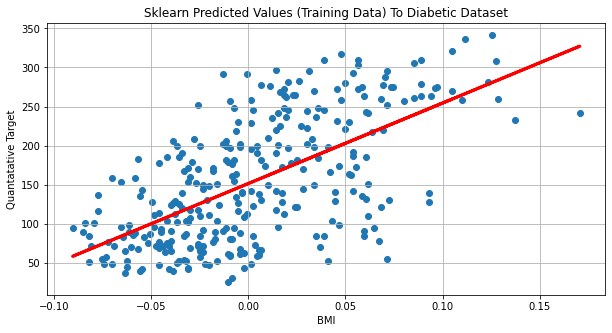

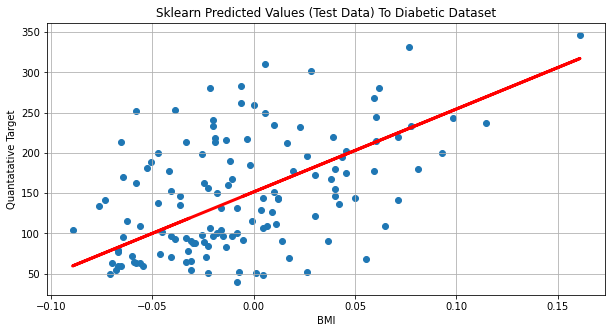

In [83]:
plt.figure(figsize=(10,5))
plt.scatter(diabetes_X_train, diabetes_y_train)
plt.plot(diabetes_X_train, diabetes_skl_y_predict_train, color='red', linewidth=3)
plt.title('Sklearn Predicted Values (Training Data) To Diabetic Dataset')
plt.xlabel('BMI')
plt.ylabel('Quantatative Target')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
plt.scatter(diabetes_X_test, diabetes_y_test)
plt.plot(diabetes_X_test, diabetes_skl_y_predict_test, color='red', linewidth=3)
plt.title('Sklearn Predicted Values (Test Data) To Diabetic Dataset')
plt.xlabel('BMI')
plt.ylabel('Quantatative Target')
plt.grid(True)
plt.show()

# **Comparison of Sklearn linear_model.LinearRegression() Model to Created**
**Example 1:** California House Price Dataset

In [84]:
from sklearn import linear_model
house_reg = linear_model.LinearRegression()
house_reg.fit(house_X_train, house_y_train)
house_skl_y_predict_train = house_reg.predict(house_X_train)
house_skl_y_predict_test = house_reg.predict(house_X_test)

In [85]:
print(f'Best House Model R2: {house_best_model.score()} with a LR = {house_best_model.learning_rate}')
print(f'Final weights: {house_best_model.weights[0]}\tFinal bias: {house_best_model.bias}\n')

print(f'Sklearn House Model R2: {house_reg.score(house_X_train, house_y_train)}')
print(f'Final weights: {house_reg.coef_[0]}\tFinal bias: {house_reg.intercept_}\n')

# Showing the value comparison between the Actual and Predicted values
house_Y_pred = house_best_model.predict(house_X_test)
print('Comparison Between Predicted and Actual Values:')
print(f'y_pred: {np.round(house_Y_pred[:10],3)}\n')
print(f'y_test: {house_y_test[:10]}\n')

Best House Model R2: 0.47316089823960983 with a LR = 0.001
Final weights: 0.45394718830049824	Final bias: 0.278246173909485

Sklearn House Model R2: 0.4768814046837193
Final weights: 0.42026895998888364	Final bias: 0.43790707418290586

Comparison Between Predicted and Actual Values:
y_pred: [3.189 2.178 1.069 1.84  3.828 2.755 2.44  1.309 2.01  2.044]

y_test: [2.787 2.076 0.967 3.538 3.905 3.088 2.813 0.675 0.99  2.822]



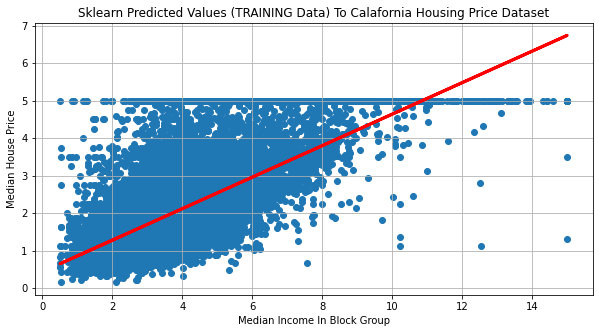

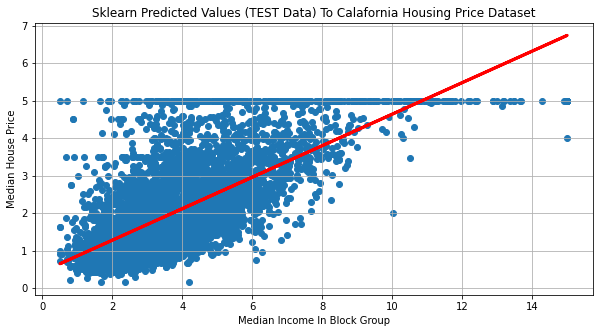

In [86]:
plt.figure(figsize=(10,5))
plt.scatter(house_X_train, house_y_train)
plt.plot(house_X_train, house_skl_y_predict_train, color='red', linewidth=3)
plt.title('Sklearn Predicted Values (TRAINING Data) To Calafornia Housing Price Dataset')
plt.xlabel('Median Income In Block Group')
plt.ylabel('Median House Price')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
plt.scatter(house_X_test, house_y_test)
plt.plot(house_X_test, house_skl_y_predict_test, color='red', linewidth=3)
plt.title('Sklearn Predicted Values (TEST Data) To Calafornia Housing Price Dataset')
plt.xlabel('Median Income In Block Group')
plt.ylabel('Median House Price')
plt.grid(True)
plt.show()